In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:\DevN\DSlab3\\nobel.csv')

In [3]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
#Q1
df.groupby('birth_country')['year'].sum().nlargest(1)

birth_country
United States of America    512980
Name: year, dtype: int64

In [5]:
df.groupby('sex')['year'].sum().nlargest(1)

sex
Male    1645643
Name: year, dtype: int64

In [6]:
import numpy as np

In [7]:
df['usa_born_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year']/10)*10).astype('int64')
prop_usa_winners = df.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


In [8]:
#Q4
import seaborn as sns

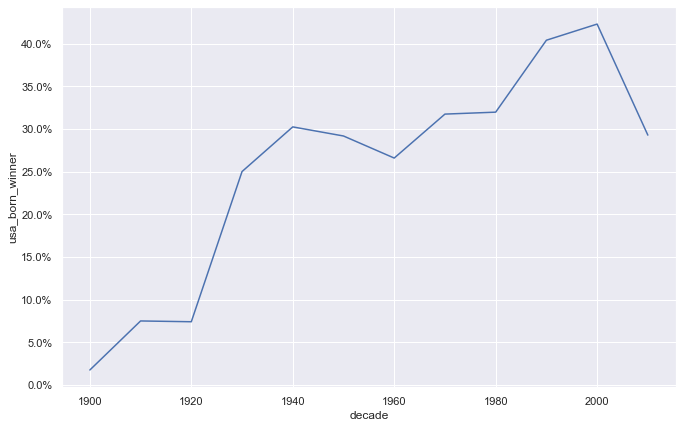

In [9]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [15]:
#Q5 Male to female ratio
(len(df[df['sex'] == 'Male'])/len(df[df['sex'] == 'Female']))

17.06122448979592

In [19]:
#Q6 TO DETERMINE INDEX AT WHICH FIRST FEMALE CAME
df.loc[df.sex =='Female'].index[0]

19

In [30]:
df.iloc[df.loc[df.sex =='Female'].index[0],[1,7]]

category                         Physics
full_name    Marie Curie, née Sklodowska
Name: 19, dtype: object

In [31]:
#Q7 
df[df.duplicated(['full_name'], keep=False)]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960


In [39]:
#Q11
# Converting birth_date from String to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'])
# Calculating the age of Nobel Prize winners
df['age'] = df['year'] - df['birth_date'].dt.year

In [40]:
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,...,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,False,2010,71.0
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,...,Male,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,65.0
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,...,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,False,2010,82.0
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,...,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,False,2010,65.0


In [57]:
#Q11
df.iloc[df.groupby(by='age')['year'].idxmin().nlargest(1),[7]]

,full_name
885,Malala Yousafzai
